## 1.7 연습문제

### 1.7.1 진법 변환

진법 변환 함수를 만들어보자.

In [13]:
10 == 3**2 * 1 + 3**1 * 0 + 3**0 * 1

True

#### My code

In [41]:
def change_base(value, new_base, original_base=10):
    value_dec = int(str(value), original_base)
    highest_place = 0
    while 1:
        if value >= new_base ** highest_place:
            highest_place += 1 
            continue
        else:
            highest_place -= 1
            break
    print(f'Highest place is: {highest_place}')
    
    temp_value = value_dec
    temp_place = highest_place
    res = ''
    while len(res) != highest_place + 1:
        div_res = divmod(temp_value, new_base ** temp_place)
        res += str(div_res[0])
        temp_place -= 1
        temp_value = div_res[1]
    
    return res

In [45]:
change_base(50, 3)

Highest place is: 3


'1212'

In [33]:
def validate_result(result, new_base):
    return int(str(result), new_base)

In [46]:
validate_result(1212, 3)

50

#### Answer suggested

In [55]:
def convert_to_decimal(number, base):
    multiplier, result = 1, 0
    while number > 0:
        result += number % 10 * multiplier
        print(f'Result: {result}, Number: {number}, multiplier: {multiplier}')
        multiplier *= base
        number = number // 10
    return result

In [56]:
convert_to_decimal(1212, 3)

Result: 2, Number: 1212, multiplier: 1
Result: 5, Number: 121, multiplier: 3
Result: 23, Number: 12, multiplier: 9
Result: 50, Number: 1, multiplier: 27


50

값이 이상해서 봤더니 문제를 잘 못 이해했다. 

그냥 다른 진법의 숫자를 10진수로 변환하기만 하면 되는 문제이다. 

이건 그냥 다음과 같이 하면 되는데.

In [52]:
n = 1001
base = 2

int(str(n), base)

9

이번엔 10진수를 다른 진법으로 변환하는 함수를 만들어본다. 

이게 내가 한 것과 같은 것이다. 

In [59]:
def convert_from_decimal(number, base):
    multiplier, result = 1, 0
    while number > 0:
        print(f'result: {result}, number: {number}, multiplier: {multiplier}')
        result += number % base * multiplier
        multiplier *= 10
        number = number // base
    return result

In [60]:
convert_from_decimal(50, 3)

result: 0, number: 50, multiplier: 1
result: 2, number: 16, multiplier: 10
result: 12, number: 5, multiplier: 100
result: 212, number: 1, multiplier: 1000


1212

어떻게 이렇게 간단하게 결과가 나오는가? 

진법변환 계산은 결국 계속 base의 수로 묶어가며 mod를 구하는 것이기 때문. 

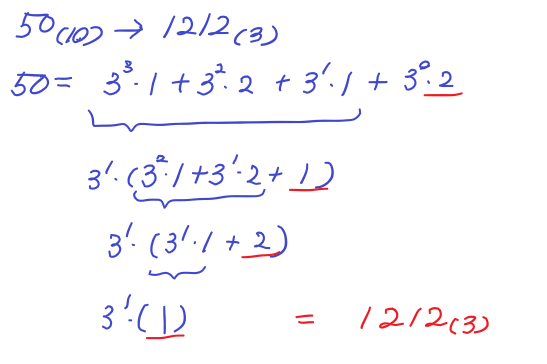

내가 짠 함수나 이 함수나 2 <= `base` <= 10 범위 내에서 작동한다. 

hex 같은 것은 수를 나타내는데 문자가 섞이기 때문에 이 방법으론 안된다. 

책에선 다음과 같은 간단하고 효과적인 solution을 제시한다. 

In [61]:
def convert_from_decimal_larger_bases(number, base):
    strings = '0123456789ABCDEFGHIJ'
    result = ""
    while number > 0:
        digit = number % base
        result = strings[digit] + result
        number = number // base
    return result

재귀함수를 통해서도 진법을 변환할 수 있다. 

In [65]:
def convert_dec_to_any_base_recursive(number, base):
    convertString = '0123456789ABCDEF'
    if number < base:
        return convertString[number]
    else:
        return convert_dec_to_any_base_recursive(number // base, base) + convertString[number % base]

In [66]:
convert_dec_to_any_base_recursive(50, 3)

'1212'

In [67]:
convert_dec_to_any_base_recursive(1000, 16)

'3E8'

### 1.7.2 Greatest Common Divisor (최대공약수)

#### My Code

In [73]:
def gcd(num1, num2):
    temp = min(num1, num2)
    while temp > 1:
        if num1 % temp == 0 and num2 % temp == 0:
            return temp
        else:
            temp -= 1

In [74]:
gcd(21, 12)

3

#### Answer Suggested

In [77]:
def gcd(a, b):
    while (b != 0):
        result = b
        a, b = b, a % b
    return result

In [76]:
gcd(21, 12)

3

유클리드 호제법을 이용한 방법이다. 

도형의 관점에서 생각한다면 직사각형에서 짧은 변을 접어가며 가장 작은 정사각형을 찾아가는 과정이다. 

### 1.7.3 `random` 모듈


In [90]:
import random
import numpy as np

values_l = [1,2,3,4]

In [80]:
random.choice(values_l)

4

In [88]:
random.sample(values_l, 2)

[4, 2]

In [93]:
np.random.choice(values_l, size=2, replace=False)

array([3, 4])

In [92]:
np.random.choice(values_l, size=10, replace=True)

array([3, 3, 4, 3, 2, 3, 2, 2, 4, 1])

In [84]:
random.shuffle(values_l)

In [85]:
values_l

[2, 1, 3, 4]

In [86]:
random.randint(0, 10)

2

### 1.7.4 Fibonacci Sequence

피보나치 수열을 찾는 함수를 두 개 이상 만들어보자. 

1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233

#### My Code

In [104]:
def fibonacci_recursive(n):
    if n <= 2:
        return 1
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

In [106]:
fibonacci_recursive(10)

55

In [109]:
def fibonacci_loop(n):
    if n <= 2:
        return 1
    
    n1 = 1
    n2 = 1
    for i in range(2, n):
        temp = n2
        n2 = n1 + n2
        n1 = temp
        
    return n2
        

In [110]:
fibonacci_loop(10)

55

#### Answer Suggested

In [111]:
import math

def find_fibonacci_seq_iter(n):
    if n < 2:
        return n
    a, b = 0, 1
    for i in range(n):
        a, b = b, a+b
    return a

In [112]:
a = 5
b = 4
a, b = a+b, a 

이와 같은 상황에 오른쪽부터 evaluate 된다. 

내 코드처럼 temp 를 만들 필요가 없다. 

```python
a, b = 5+4, 5
```

In [113]:
a

9

In [114]:
b

5

In [116]:
def find_fibonacci_seq_rec(n):
    if n < 2:
        return n
    return find_fibonacci_seq_rec(n-1) + find_fibonacci_seq_rec(n-2)

In [118]:
def find_fibonacci_seq_formula(n):
    sq5 = math.sqrt(5)
    phi = (1 + sq5) / 2
    return int(math.floor(phi ** n / sq5))

In [119]:
find_fibonacci_seq_formula(10)

55

In [121]:
find_fibonacci_seq_formula(100) # 70번 이상의 결과는 정확하지 않다. 

354224848179263111168

In [122]:
fibonacci_loop(100)

354224848179261915075

### 1.7.5 소수

생략

### 1.7.6 numpy

생략